Nguyễn Thị Kiều Nhung 11203041


In [1]:
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
torch.manual_seed(2)

Bài 1:
Cho bài toán XOR
Implement thuật toán neural network để giải bài toán dùng Pytorch


In [2]:
X = torch.Tensor([[0,0],[0,1], [1,0], [1,1]])
Y = torch.Tensor([0,1,1,0]).view(-1,1)

In [3]:
# Define Neural Net with one hidden layer

class XOR(nn.Module):
    def __init__(self, input_dim=2, output_dim=1):
        super(XOR, self).__init__()
        self.lin1 = nn.Linear(input_dim, 2) # Lớp ẩn với 2 đầu vào và 2 đầu ra
        self.lin2 = nn.Linear(2, output_dim) # Lớp đầu ra với 1 đầu ra

    def forward(self, x):
        x = self.lin1(x)
        x = F.sigmoid(x)
        x = self.lin2(x)
        return x

In [4]:
# Initialize neural net

model = XOR()

In [5]:
def weights_init(model):
    for m in model.modules():
        if isinstance(m, nn.Linear):
            # initialize the weight tensor, here we use a normal distribution
            m.weight.data.normal_(0, 1)

weights_init(model)

In [6]:
loss_func = nn.MSELoss() # hàm mất mát mean squared error
optimizer = optim.SGD(model.parameters(), lr=0.02, momentum=0.9) # use stochastic fradient descent


In [7]:
%matplotlib inline
epochs = 2001
steps = X.size(0)
for i in range(epochs):
    for j in range(steps):
        data_point = np.random.randint(X.size(0))
        x_var = Variable(X[data_point], requires_grad=False)
        y_var = Variable(Y[data_point], requires_grad=False)

        optimizer.zero_grad()
        y_hat = model(x_var)
        loss = loss_func.forward(y_hat, y_var)
        loss.backward()
        optimizer.step()

    if i % 500 == 0:
        print (f"Epoch: {i}, Loss: {loss}, " ) # loss.item()

Epoch: 0, Loss: 1.7205522060394287, 
Epoch: 500, Loss: 1.2033893881380209e-09, 
Epoch: 1000, Loss: 1.4210854715202004e-14, 
Epoch: 1500, Loss: 5.684341886080802e-14, 
Epoch: 2000, Loss: 8.881784197001252e-14, 


In [8]:
model_params = list(model.parameters())
model_params

[Parameter containing:
 tensor([[-3.4361, -3.5163],
         [ 1.7470,  1.7633]], requires_grad=True),
 Parameter containing:
 tensor([ 0.2672, -2.6248], requires_grad=True),
 Parameter containing:
 tensor([[-3.0624, -2.7026]], requires_grad=True),
 Parameter containing:
 tensor([1.9172], requires_grad=True)]

In [9]:
model_weights = model_params[0].data.numpy()
model_bias = model_params[1].data.numpy()
model_weights

array([[-3.4360697, -3.5162866],
       [ 1.7469656,  1.7632699]], dtype=float32)

In [10]:
model_bias

array([ 0.26719967, -2.6247747 ], dtype=float32)

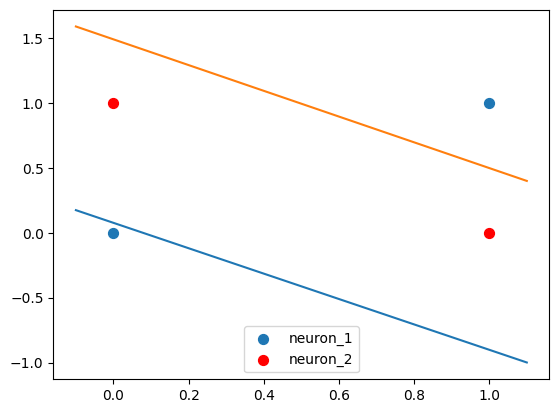

In [11]:
plt.scatter(X.numpy()[[0,-1], 0], X.numpy()[[0, -1], 1], s=50)
plt.scatter(X.numpy()[[1,2], 0], X.numpy()[[1, 2], 1], c='red', s=50)

x_1 = np.arange(-0.1, 1.1, 0.1)
y_1 = ((x_1 * model_weights[0,0]) + model_bias[0]) / (-model_weights[0,1])
plt.plot(x_1, y_1)

x_2 = np.arange(-0.1, 1.1, 0.1)
y_2 = ((x_2 * model_weights[1,0]) + model_bias[1]) / (-model_weights[1,1])
plt.plot(x_2, y_2)
plt.legend(["neuron_1", "neuron_2"], loc=8)
plt.show()

In [12]:
with torch.no_grad():
  predicted = model(X)

  print('y_hat:')
  for i in range(len(X)):
    print(print(f"Input: {X[i].tolist()}, Dự đoán: {predicted[i].tolist()[0]}, Thực tế: {Y[i].tolist()[0]}"))

y_hat:
Input: [0.0, 0.0], Dự đoán: 0.0, Thực tế: 0.0
None
Input: [0.0, 1.0], Dự đoán: 0.9999997019767761, Thực tế: 1.0
None
Input: [1.0, 0.0], Dự đoán: 0.9999997019767761, Thực tế: 1.0
None
Input: [1.0, 1.0], Dự đoán: 3.5762786865234375e-07, Thực tế: 0.0
None


### Bài 2:
Cho dataset MNIST
* Implement thuật toán neural network với dữ liệu trên sử dụng Pytorch
* Chỉnh learning rate, vẽ đồ thị loss tương ứng.
* Chia tập train/test tỉ lệ 80/20, tính các chỉ số MSE, RSME, MAE, MAPE trên tập test.


Bài 3:
Tại sao hàm softmax lại dùng exponential function (e) mà không phải số khác như 2, 3 hoặc 4


softmax = exp(x) / sum(exp(x))
* It is a monotonic function, meaning that it always increases or decreases as its input increases. This is important because we want the softmax function to produce a probability distribution, and probabilities must always sum to 1.
* It is a differentiable function, meaning that it has a derivative that can be calculated. This is important because we need to be able to calculate the gradient of the softmax function in order to train neural networks using backpropagation.
* It is a non-negative function, meaning that it always outputs a non-negative value. This is important because probabilities must be non-negative.

Epoch [1/200], Loss: 2.2500
Epoch [51/200], Loss: 0.3394
Epoch [101/200], Loss: 0.2809
Epoch [151/200], Loss: 0.2421


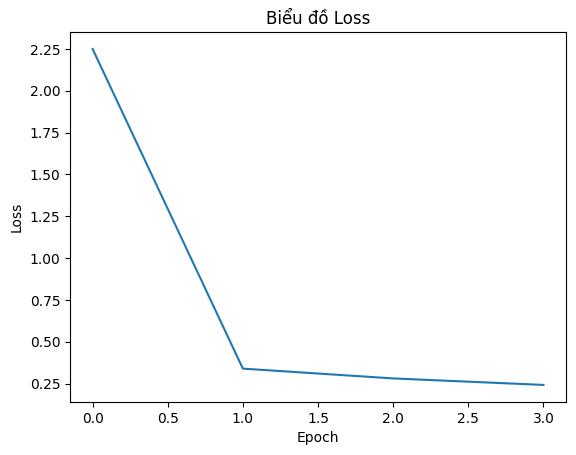

Accuracy on the test set: 93.76%
Recall on the test set: 0.9370
F1-score on the test set: 0.9370


In [15]:
import torchvision
import torchvision.transforms as transforms
from sklearn.metrics import accuracy_score, recall_score, f1_score


train_data = torchvision.datasets.MNIST(
    root="./data", train=True, download=True, transform=transforms.ToTensor()
)
test_data = torchvision.datasets.MNIST(
    root="./data", train=False, download=True, transform=transforms.ToTensor()
)

from sklearn.metrics import mean_squared_error, mean_absolute_error

from torch.utils.data import Dataset, DataLoader, random_split

train_size = int(0.8 * len(train_data))
test_size = len(train_data) - train_size
# split
train, test = random_split(train_data, [train_size, test_size])
train_dataloader = DataLoader(train, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test, batch_size=64, shuffle=False)

train, test = random_split(train_data, [train_size, test_size])


# Hàm tính MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Hàm hiển thị đồ thị loss
def plot_loss(loss_values):
    plt.plot(loss_values)
    plt.title('Biểu đồ Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.show()

# Định nghĩa mạng neural network
class Net(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(Net, self).__init__()
        self.lin1 = nn.Linear(input_dim, hidden_dim)
        self.relu = nn.ReLU()
        self.lin2 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        x = x.view(-1, 784)  # Flatten ảnh
        x = self.lin1(x)
        x = self.relu(x)
        x = self.lin2(x)

        return x

# Khởi tạo mạng neural network
net = Net(784,128,10)

# Định nghĩa hàm mất mát và bộ tối ưu
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(net.parameters(), lr=0.001)

# Huấn luyện mạng
num_epochs = 200
loss_values = []

for epoch in range(num_epochs):
    running_loss = 0.0
    for i, data in enumerate(train_dataloader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    if epoch % 50 == 0:
        # print (f"Epoch: {i}, Loss: {loss}, " ) # loss.item()
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss / len(train_dataloader):.4f}')
        loss_values.append(running_loss / len(train_dataloader))

# Vẽ đồ thị loss
plot_loss(loss_values)

# Đánh giá mô hình trên tập kiểm tra
net.eval()  # Đặt mô hình vào chế độ đánh giá
test_loss = 0.0
correct = 0
total = 0
y_true = []
y_pred = []

with torch.no_grad():
    for data in test_dataloader:
        inputs, labels = data
        outputs = net(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        y_true.extend(labels.tolist())
        y_pred.extend(predicted.tolist())

# Calculate accuracy, recall, and F1-score
accuracy = accuracy_score(y_true, y_pred)
recall = recall_score(y_true, y_pred, average='macro')  # You can choose 'micro', 'macro', or 'weighted' depending on your needs
f1 = f1_score(y_true, y_pred, average='macro')

print(f'Accuracy on the test set: {accuracy * 100:.2f}%')
print(f'Recall on the test set: {recall:.4f}')
print(f'F1-score on the test set: {f1:.4f}')

Epoch [1/500], Loss: 2.2499
Epoch [101/500], Loss: 0.2739
Epoch [201/500], Loss: 0.2066
Epoch [301/500], Loss: 0.1660
Epoch [401/500], Loss: 0.1376


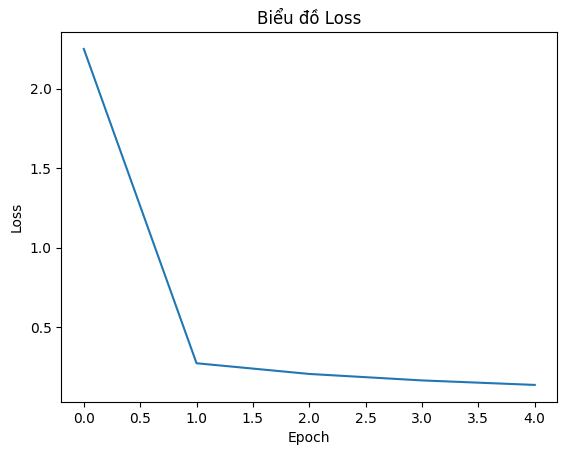

Accuracy on the test set: 95.87%
Recall on the test set: 0.9583
F1-score on the test set: 0.9584


In [16]:
import torchvision
import torchvision.transforms as transforms
from sklearn.metrics import accuracy_score, recall_score, f1_score


train_data = torchvision.datasets.MNIST(
    root="./data", train=True, download=True, transform=transforms.ToTensor()
)
test_data = torchvision.datasets.MNIST(
    root="./data", train=False, download=True, transform=transforms.ToTensor()
)

from sklearn.metrics import mean_squared_error, mean_absolute_error

from torch.utils.data import Dataset, DataLoader, random_split

train_size = int(0.8 * len(train_data))
test_size = len(train_data) - train_size
# split
train, test = random_split(train_data, [train_size, test_size])
train_dataloader = DataLoader(train, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test, batch_size=64, shuffle=False)

train, test = random_split(train_data, [train_size, test_size])


# Hàm tính MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Hàm hiển thị đồ thị loss
def plot_loss(loss_values):
    plt.plot(loss_values)
    plt.title('Biểu đồ Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.show()

# Định nghĩa mạng neural network
class Net(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(Net, self).__init__()
        self.lin1 = nn.Linear(input_dim, hidden_dim)
        self.relu = nn.ReLU()
        self.lin2 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        x = x.view(-1, 784)  # Flatten ảnh
        x = self.lin1(x)
        x = self.relu(x)
        x = self.lin2(x)

        return x

# Khởi tạo mạng neural network
net = Net(784,128,10)

# Định nghĩa hàm mất mát và bộ tối ưu
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(net.parameters(), lr=0.001)

# Huấn luyện mạng
num_epochs = 500
loss_values = []

for epoch in range(num_epochs):
    running_loss = 0.0
    for i, data in enumerate(train_dataloader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    if epoch % 100 == 0:
        # print (f"Epoch: {i}, Loss: {loss}, " ) # loss.item()
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss / len(train_dataloader):.4f}')
        loss_values.append(running_loss / len(train_dataloader))

# Vẽ đồ thị loss
plot_loss(loss_values)

# Đánh giá mô hình trên tập kiểm tra
net.eval()  # Đặt mô hình vào chế độ đánh giá
test_loss = 0.0
correct = 0
total = 0
y_true = []
y_pred = []

with torch.no_grad():
    for data in test_dataloader:
        inputs, labels = data
        outputs = net(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        y_true.extend(labels.tolist())
        y_pred.extend(predicted.tolist())

# Calculate accuracy, recall, and F1-score
accuracy = accuracy_score(y_true, y_pred)
recall = recall_score(y_true, y_pred, average='macro')  # You can choose 'micro', 'macro', or 'weighted' depending on your needs
f1 = f1_score(y_true, y_pred, average='macro')

print(f'Accuracy on the test set: {accuracy * 100:.2f}%')
print(f'Recall on the test set: {recall:.4f}')
print(f'F1-score on the test set: {f1:.4f}')